## Exploratory data analysis for Iris data set

A simple dataset to learn the basics.
3 flowers of Iris species. [see images on wikipedia link above]


1936 by Ronald Fisher.



Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.


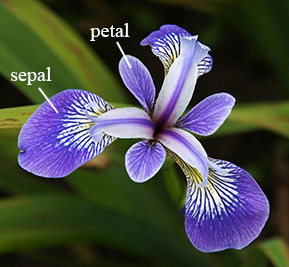


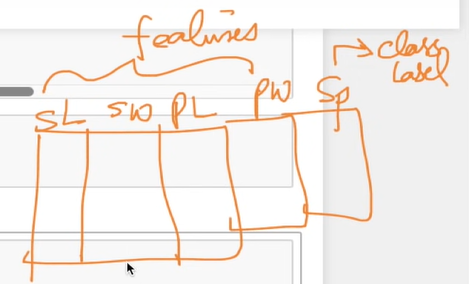
the sl, sw, pl, pw are FEATURES and species are LABEL

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = pd.read_csv("iris_data.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# How many data-points?
iris.shape

(150, 5)

In [7]:
# what are the column names in the iris dataset?
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [31]:
# how many data points for each class are present?
# or how many flowers for each species are present?



iris['species'].value_counts()
# this is a balanced dataset

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

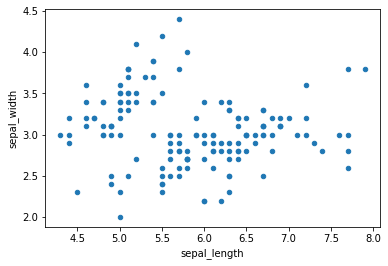

In [32]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. Just shows the scale of sl, sw
#What if we color the points by thier class-label/flower-type.

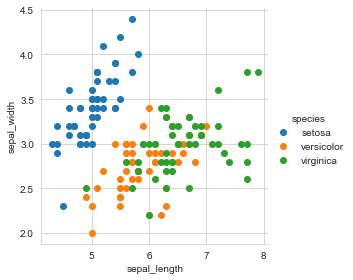

In [38]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid"); # sets backgound as white
sns.FacetGrid(iris, hue="species", height=4).map(plt.scatter, "sepal_length", "sepal_width").add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# But orange and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

#### Observations from the above graph

* Using sepal_length and sepal_width features we can distinguish 'Setosa' flowers from others.
* Seperating Versicolor from Virginica is much harder as they have considerable overlap.

if we can draw a line and classify -> lineraly seperable

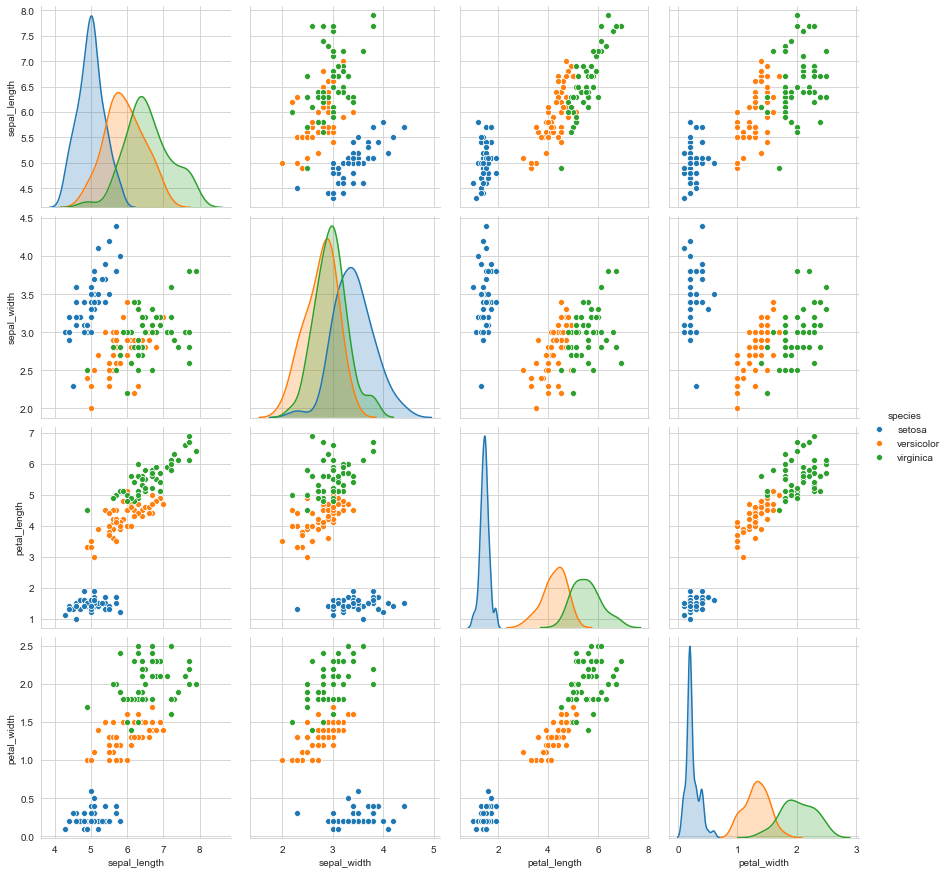

In [39]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations

* petal_length and petal_width are the most useful features
to identify various flower types.
* While Setosa can be easily identified (linearly seperable), Virnica and Versicolor
have some overlap (almost linearly seperable).
* We can find "lines" and "if-else" conditions to build
a simple model to classify the flower types.

#### Limitations of Pair plots

* cannot be used to visualize where the dimensions are say 100, 10000 or more
* Only possible to view 2D pattern


### Histograms and intro to pdf/ cdf

In [57]:
# getting the individual data and takin all the data
# points that corresponds to iris setosa and putting it in 
# iris_setosa; likewise all the other are also taken

iris_setosa = iris.loc[iris["species"] == "setosa"]

iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]

No handles with labels found to put in legend.


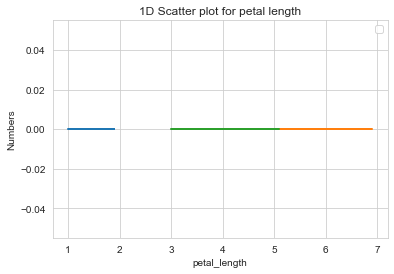

In [58]:
# let's make a 1D scatter plot
import numpy as np
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']))
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']))

plt.title("1D Scatter plot for petal length")
plt.xlabel('petal_length')
plt.ylabel('Numbers')
plt.legend()


In [59]:
# disadvantages of 1D scatter plot : very hard to make sense as points are overlapping a lot.
# there are better ways to visualize a 1D scatter plot

#### Histogram

this also only have 1D, and is a variation of 1D scatter plot


 
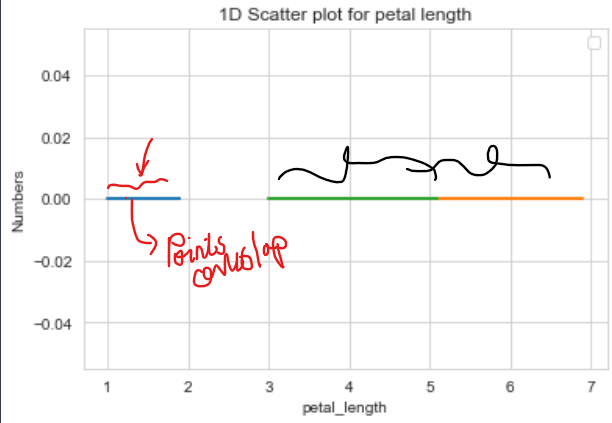
 
 for this the Histogram has y axis which is basically the count of how many points exists in these regions.
 

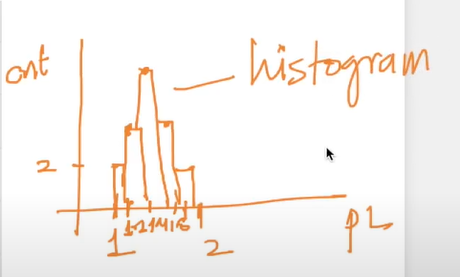

y axis is basically the count and x axis is the variable of the feature that I'm interested in.
* y axis says how many points exists between 1 and 1.2 in the above diagram

c:\users\yerpu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


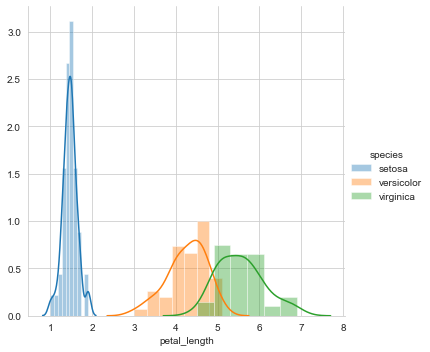

In [60]:
sns.FacetGrid(iris, hue="species", size=5).map(sns.distplot, "petal_length").add_legend()

The smoothed line are called Probability Density Function (PDF).

In [64]:
# univariate Analysis

# Need to understand which of the 4 variables (pl, pw, sl, sw)
# are more useful than other variables to classify


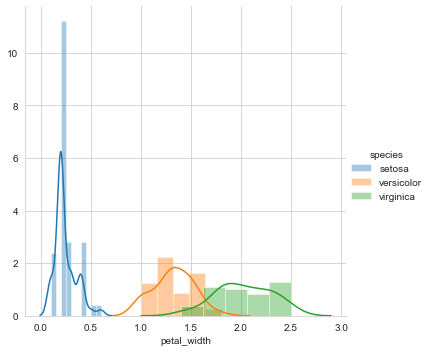

In [66]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "petal_width").add_legend()

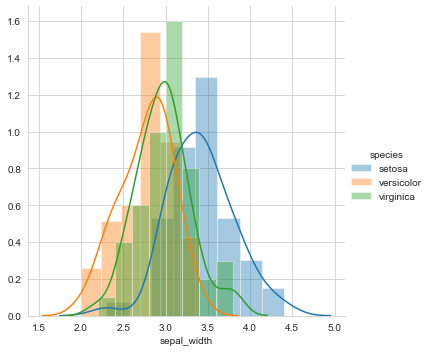

In [68]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepal_width").add_legend()

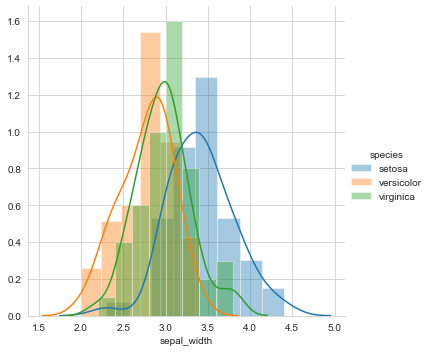

In [69]:
sns.FacetGrid(iris, hue="species", height=5).map(sns.distplot, "sepal_width").add_legend()

Among all the four variables/ features the univariate analysis shows that petal length can be used to best classify among the flowers


#pl>pw>>sl>>sw

In [61]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.

### CDF

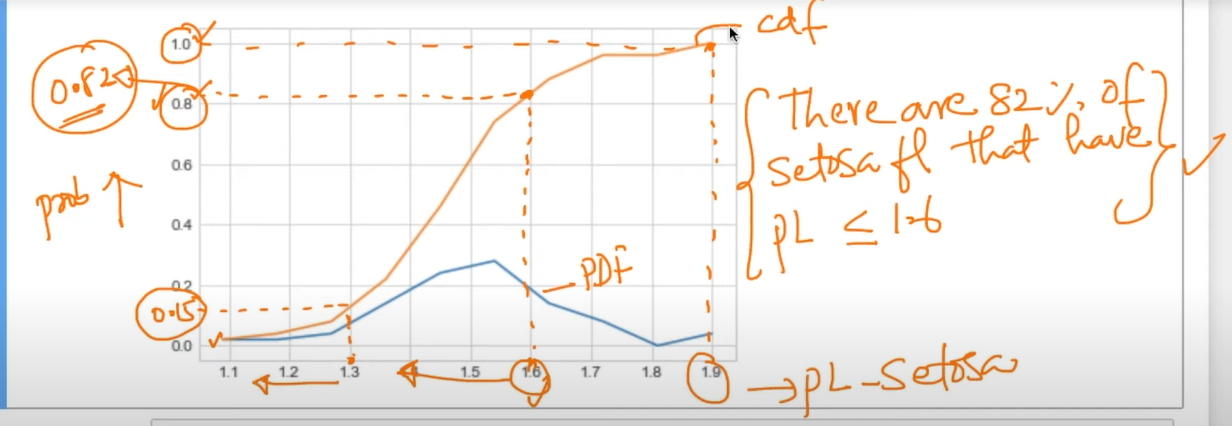

In [72]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10)
print(counts)
print(bin_edges)

[ 1  1  2  7 12 14  7  4  0  2]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [73]:
pdf = counts / sum(counts)
print(pdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


No handles with labels found to put in legend.


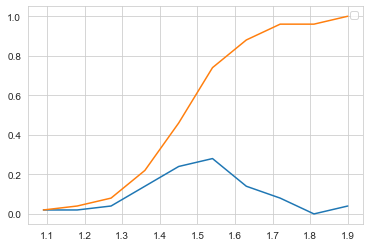

In [74]:
# to compute cdf

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend()

Mean and std-deviation

In [75]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print("Mean with an outlier", np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
Mean with an outlier 2.4156862745098038
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


Median, Quantiles, Percentiles, IQR.

In [76]:

print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


Box-plot with whiskers

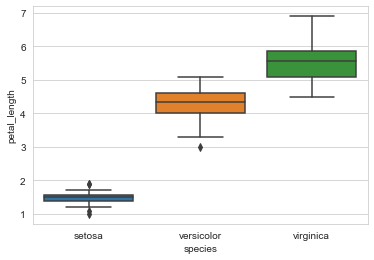

In [77]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

Violin plots

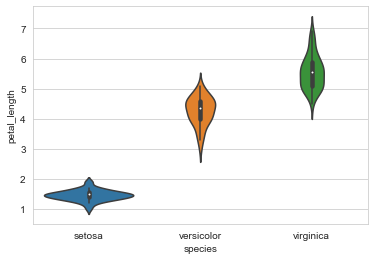

In [78]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

1. Petal Length of Setosa is normally distributed.
2. I don't see the same about Versicolor and Virginica.
Team, don't you think there is some skewness seen in other two plots? (Correct me, If I am wrong?) or is it just because of spread of data is high in virginica and versicolor?

Multivariate probability density, contour plot.

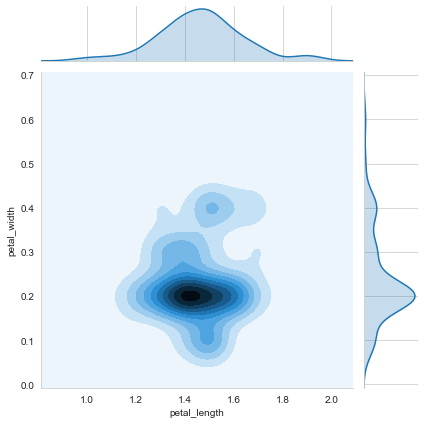

In [80]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();